In [ ]:
!pip install opencv-python-headless numpy scikit-learn matplotlib

In [ ]:
import numpy as np
import cv2
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from google.colab import files
from IPython.display import display, Image
import io


In [ ]:
def upload_and_read_image():
    uploaded = files.upload('Sample.jpg')
    file_name = next(iter(uploaded))
    file_bytes = uploaded[file_name]
    nparr = np.frombuffer(file_bytes, np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img


In [ ]:
def display_cv2_image(image, title='Image'):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
def resize_image(image, size, method='linear'):
    interpolation = {
        'linear': cv2.INTER_LINEAR,
        'nearest': cv2.INTER_NEAREST,
        'cubic': cv2.INTER_CUBIC
    }
    return cv2.resize(image, size, interpolation=interpolation[method])

In [ ]:
def apply_blur(image, method='gaussian', kernel_size=(5,5)):
    """Apply different types of blur to image"""
    if method == 'box':
        return cv2.blur(image, kernel_size)
    elif method == 'gaussian':
        return cv2.GaussianBlur(image, kernel_size, 0)
    elif method == 'adaptive':
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image
        return cv2.adaptiveThreshold(gray, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)



Please upload an image...


Saving SAMPLE.jpg to Sample.jpg/SAMPLE.jpg


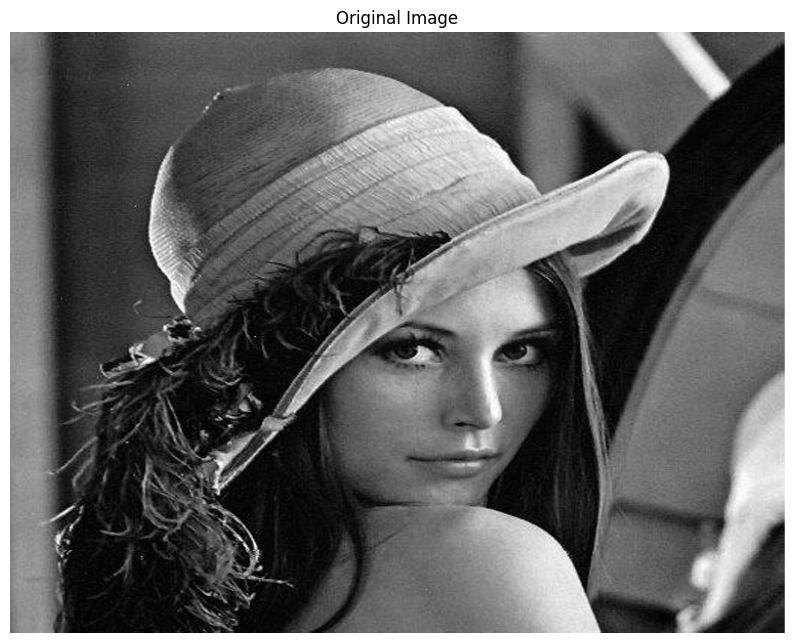

In [ ]:
# Upload image
print("Please upload an image...")
image = upload_and_read_image()
display_cv2_image(image, 'Original Image')



Resizing with different interpolation methods...


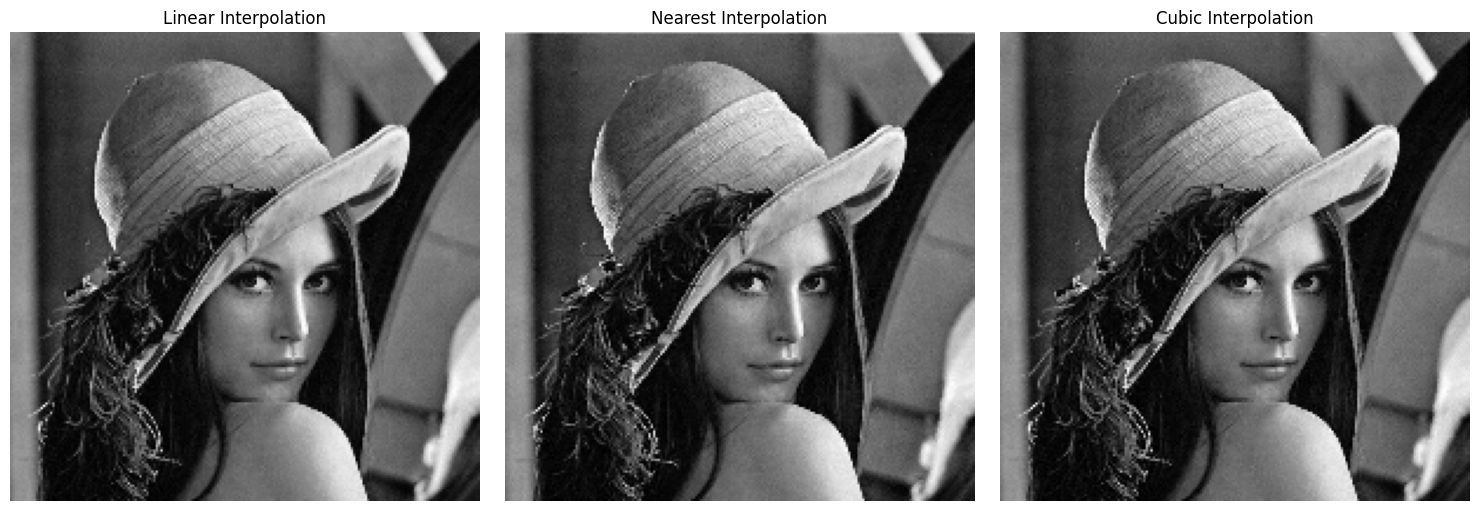

In [ ]:
print("\nResizing with different interpolation methods...")
size = (200, 200)
methods = ['linear', 'nearest', 'cubic']

plt.figure(figsize=(15, 5))
for i, method in enumerate(methods, 1):
    resized = resize_image(image, size, method)
    plt.subplot(1, 3, i)
    plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
    plt.title(f'{method.capitalize()} Interpolation')
    plt.axis('off')
plt.tight_layout()
plt.show()

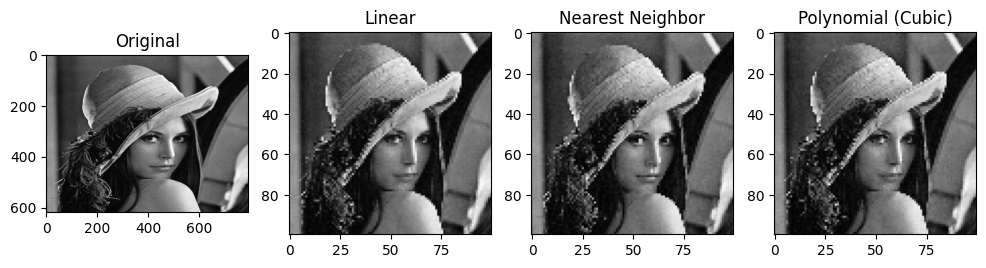

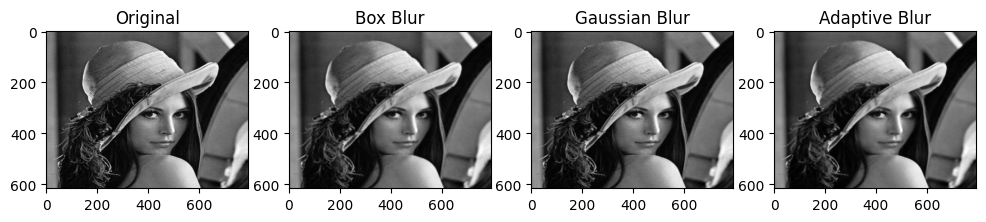

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image, ensure the path is correct
# If 'Image1.jpg' is not in the same folder, provide the full path.
image = cv2.imread("SAMPLE.jpg", cv2.IMREAD_GRAYSCALE)

# Check if image loaded successfully
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Resize using different interpolation methods
    linear_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)
    nearest_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_NEAREST)
    cubic_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_CUBIC)

    # Display results
    fig, axs = plt.subplots(1, 4, figsize=(12, 4))
    axs[0].imshow(image, cmap="gray"), axs[0].set_title("Original")
    axs[1].imshow(linear_resized, cmap="gray"), axs[1].set_title("Linear")
    axs[2].imshow(nearest_resized, cmap="gray"), axs[2].set_title("Nearest Neighbor")
    axs[3].imshow(cubic_resized, cmap="gray"), axs[3].set_title("Polynomial (Cubic)")
    plt.show()

    # Box Blur
    box_blur = cv2.blur(image, (5, 5))

    # Gaussian Blur
    gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

    # Adaptive Blurring (Using Bilateral Filter)
    adaptive_blur = cv2.bilateralFilter(image, 9, 75, 75)

    # Display results
    fig, axs = plt.subplots(1, 4, figsize=(12, 4))
    axs[0].imshow(image, cmap="gray"), axs[0].set_title("Original")
    axs[1].imshow(box_blur, cmap="gray"), axs[1].set_title("Box Blur")
    axs[2].imshow(gaussian_blur, cmap="gray"), axs[2].set_title("Gaussian Blur")
    axs[3].imshow(adaptive_blur, cmap="gray"), axs[3].set_title("Adaptive Blur")
    plt.show()

In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
!pip install opencv-python-headless numpy scikit-learn matplotlib
# %%
import numpy as np
import cv2
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from google.colab import files
from IPython.display import display, Image
import io
# Import load_digits
from sklearn.datasets import load_digits

# %%
# ... (rest of the code remains the same) ...

Loading MNIST dataset...

Training Naive Bayes...
Fold 1 validation score: 0.8438
Fold 2 validation score: 0.8299
Fold 3 validation score: 0.8502
Fold 4 validation score: 0.8606
Fold 5 validation score: 0.8118
Average CV score: 0.8393

Training SVM...
Fold 1 validation score: 1.0000
Fold 2 validation score: 0.9826
Fold 3 validation score: 0.9791
Fold 4 validation score: 0.9861
Fold 5 validation score: 0.9861
Average CV score: 0.9868

Detailed Results for Naive Bayes:
Cross-validation score: 0.8393
Test accuracy: 0.8472
Precision: 0.8751
Recall: 0.8472
F1-score: 0.8490

Confusion Matrix for Naive Bayes:


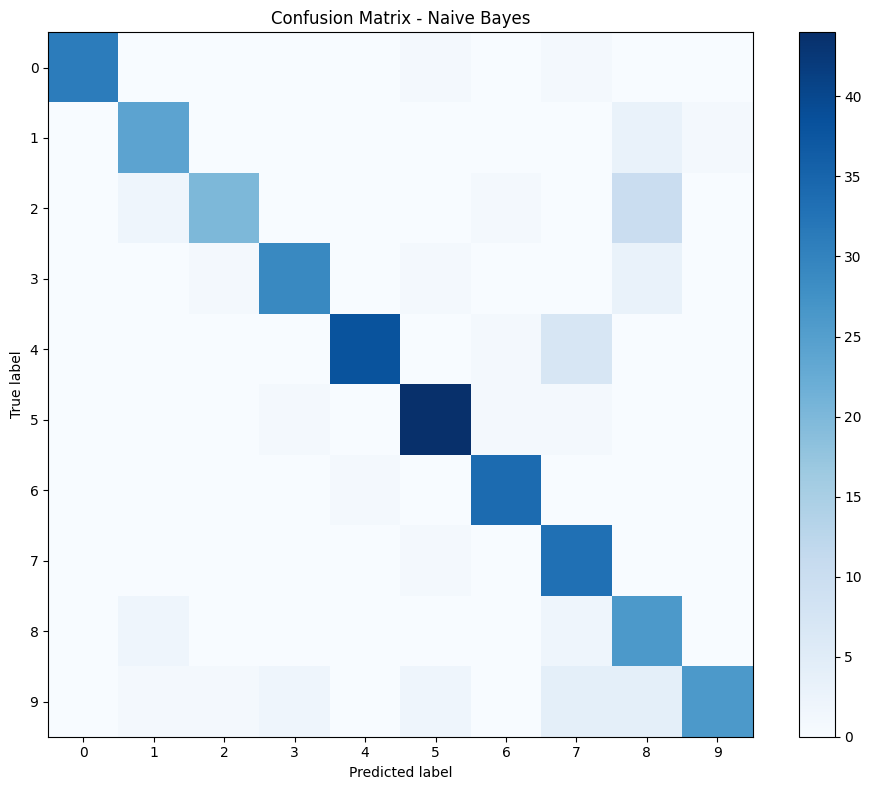


Detailed Results for SVM:
Cross-validation score: 0.9868
Test accuracy: 0.9861
Precision: 0.9862
Recall: 0.9861
F1-score: 0.9861

Confusion Matrix for SVM:


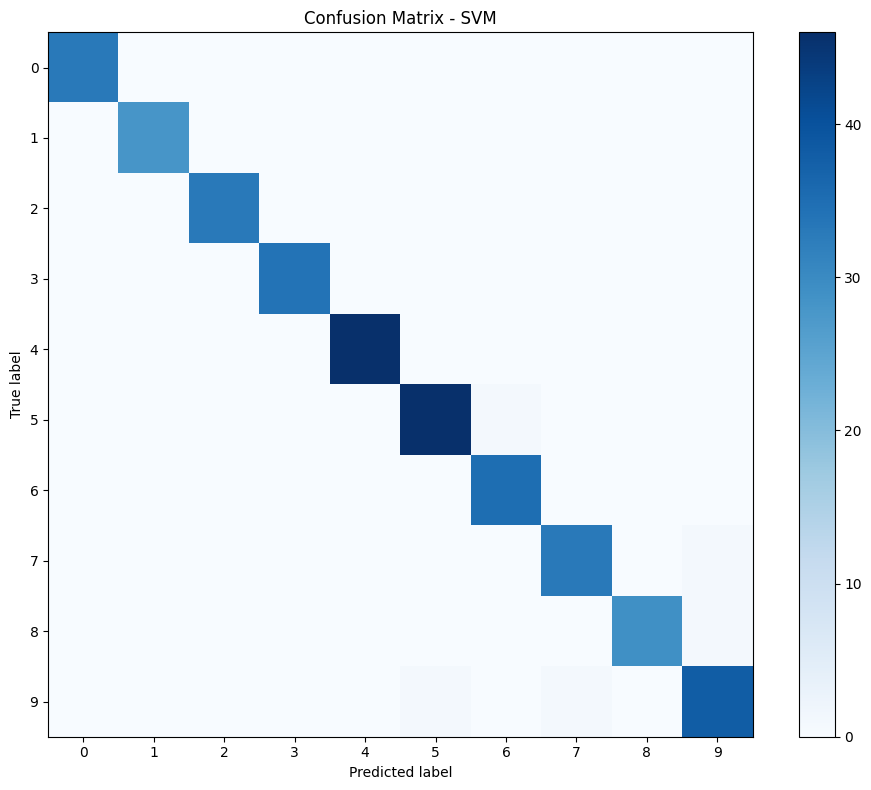

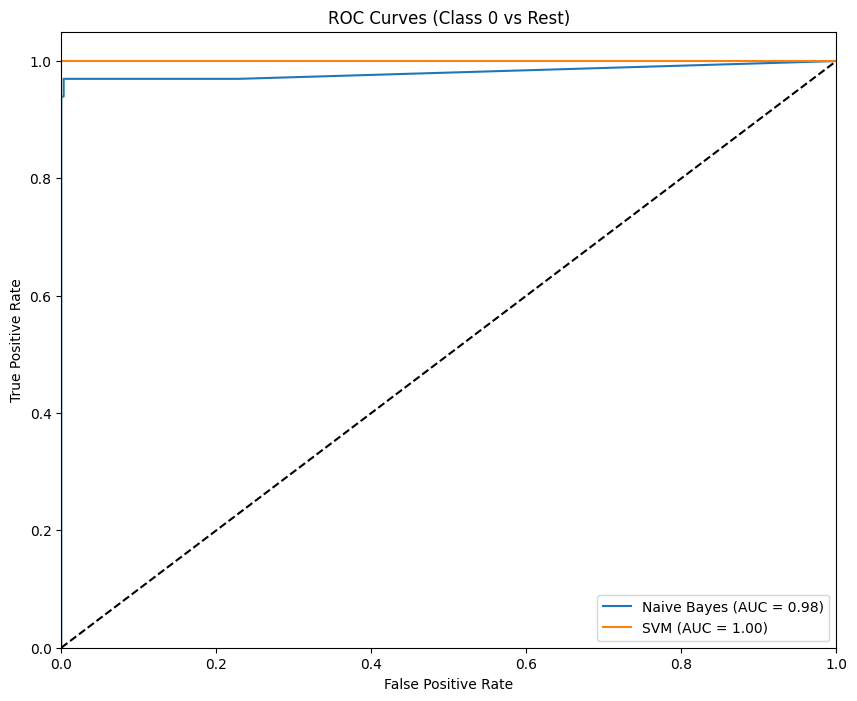

In [ ]:

"""# Task 2: Machine Learning on MNIST"""

def load_and_prepare_data():
    """Load MNIST dataset and prepare for training"""
    print("Loading MNIST dataset...")
    digits = load_digits()
    X = digits.data
    y = digits.target
    return train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """Train and evaluate Naive Bayes and SVM models"""
    models = {
        'Naive Bayes': GaussianNB(),
        'SVM': SVC(probability=True)
    }

    results = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")

        # K-fold Cross Validation
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = []

        for fold, (train_idx, val_idx) in enumerate(kf.split(X_train), 1):
            X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
            y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

            model.fit(X_train_fold, y_train_fold)
            score = model.score(X_val_fold, y_val_fold)
            cv_scores.append(score)
            print(f"Fold {fold} validation score: {score:.4f}")

        print(f"Average CV score: {np.mean(cv_scores):.4f}")

        # Final training on full training set
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate metrics
        results[name] = {
            'cv_scores': np.mean(cv_scores),
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, average='weighted'),
            'recall': recall_score(y_test, y_pred, average='weighted'),
            'f1': f1_score(y_test, y_pred, average='weighted'),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

        # ROC curve and AUC (One-vs-Rest)
        y_test_bin = label_binarize(y_test, classes=range(10))
        y_score = model.predict_proba(X_test)

        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(10):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        results[name]['roc'] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

    return results

def plot_confusion_matrix(cm, title):
    """Plot confusion matrix heatmap"""
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    classes = range(10)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

def plot_roc_curves(results):
    """Plot ROC curves for all models"""
    plt.figure(figsize=(10, 8))

    for name, result in results.items():
        # Plot ROC curve for first class as example
        plt.plot(result['roc']['fpr'][0], result['roc']['tpr'][0],
                label=f'{name} (AUC = {result["roc"]["auc"][0]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves (Class 0 vs Rest)')
    plt.legend(loc="lower right")
    plt.show()

"""## Train and Evaluate Models"""

# Load and prepare data
X_train, X_test, y_train, y_test = load_and_prepare_data()

# Train and evaluate models
results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

# Print detailed results
for name, result in results.items():
    print(f"\nDetailed Results for {name}:")
    print(f"Cross-validation score: {result['cv_scores']:.4f}")
    print(f"Test accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1-score: {result['f1']:.4f}")

    print(f"\nConfusion Matrix for {name}:")
    plot_confusion_matrix(result['confusion_matrix'], f'Confusion Matrix - {name}')

# Plot ROC curves
plot_roc_curves(results)

=== Naive Bayes Model Performance ===
Accuracy: 0.8111
Precision: 0.8463
Recall: 0.8103
F1 Score: 0.8137


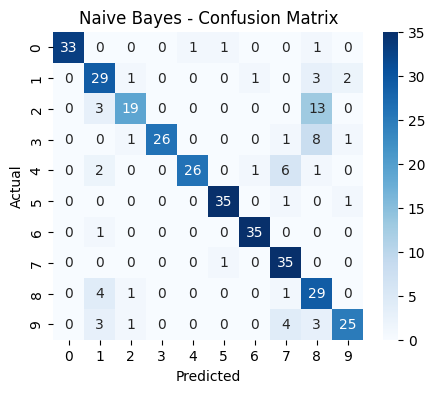

=== SVM Model Performance ===
Accuracy: 0.9917
Precision: 0.9920
Recall: 0.9915
F1 Score: 0.9916


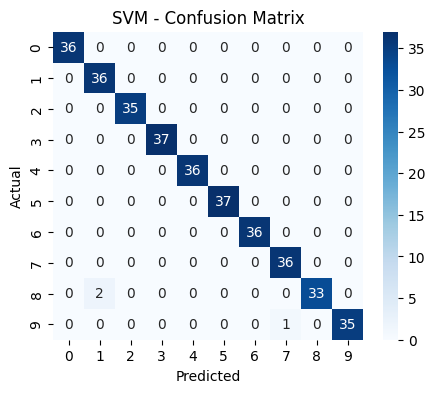

Naive Bayes - Mean Accuracy: 0.8069
SVM - Mean Accuracy: 0.9633
SVM Model AUC: 0.9995


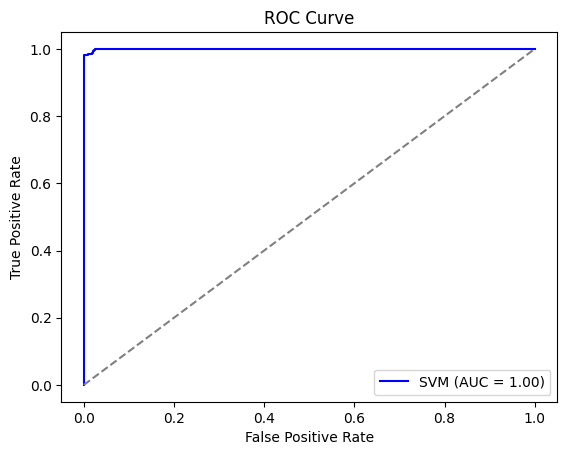

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Initialize models
nb_model = GaussianNB()
svm_model = SVC(kernel='rbf', probability=True)

# Train models
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
# Metrics function
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    cm = confusion_matrix(y_true, y_pred)

    print(f"=== {model_name} Model Performance ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate models
evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_svm, "SVM")
cv = StratifiedKFold(n_splits=5)

nb_cv_scores = cross_val_score(nb_model, X, y, cv=cv, scoring="accuracy")
svm_cv_scores = cross_val_score(svm_model, X, y, cv=cv, scoring="accuracy")

print(f"Naive Bayes - Mean Accuracy: {nb_cv_scores.mean():.4f}")
print(f"SVM - Mean Accuracy: {svm_cv_scores.mean():.4f}")
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=list(range(10)))

# Fit OneVsRest models
ovr_svm = OneVsRestClassifier(SVC(kernel='rbf', probability=True)).fit(X_train, y_train)
y_score_svm = ovr_svm.decision_function(X_test)

# Compute AUC
auc_svm = roc_auc_score(y_test_bin, y_score_svm, average="macro")
print(f"SVM Model AUC: {auc_svm:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score_svm.ravel())
plt.figure()
plt.plot(fpr, tpr, color="blue", label=f"SVM (AUC = {auc_svm:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
